In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = '/content/combined_data_5_stations.csv'
data = pd.read_csv(file_path)

# Handle missing values by imputing with the mean for numeric columns
numeric_cols = data.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Convert 'station_id' to categorical
data['station_id'] = data['station_id'].astype('category')

# Extract features from 'Date' and 'Time (GMT)'
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data['Hour'] = pd.to_datetime(data['Time (GMT)'], format='%H:%M').dt.hour

# Drop original 'Date' and 'Time (GMT)' columns
data = data.drop(columns=['Date', 'Time (GMT)'])

# Define target variable and features
target = 'Highest'
features = data.drop(columns=[target])

X = features
y = data[target]

# Encode categorical variables (station_id)
X = pd.get_dummies(X, columns=['station_id'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree Model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"R² Score: {r2_dt}")

Decision Tree Regressor Performance:
Mean Squared Error (MSE): 0.06815260264396725
R² Score: 0.7376399632487425


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R² Score: {r2_rf}")

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features by Importance:")
print(feature_importances.head(10))


Random Forest Regressor Performance:
Mean Squared Error (MSE): 0.03416969561011965
R² Score: 0.8684604512775151

Top Features by Importance:
       Feature  Importance
0    MHHW (ft)    0.837600
9        Month    0.039038
5    MLLW (ft)    0.023012
6  Lowest (ft)    0.020972
1     MHW (ft)    0.016353
8         Year    0.016286
4     MLW (ft)    0.014119
3     MTL (ft)    0.012365
2     MSL (ft)    0.012361
7          Inf    0.004752


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
dt_param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# Decision Tree Grid Search
dt_grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=dt_param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)
dt_grid_search.fit(X_train, y_train)

# Random Forest Grid Search
rf_grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)
rf_grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best MSE for Decision Tree:", -dt_grid_search.best_score_)

print("\nBest Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best MSE for Random Forest:", -rf_grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best MSE for Decision Tree: 0.0421401819924574

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best MSE for Random Forest: 0.03195053313702551


In [ ]:
#complete code for training and
#evaluating the Decision Tree and Random Forest regressors with their optimized hyperparameters:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Decision Tree with the best parameters
dt_best_model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=2,
    random_state=42
)
dt_best_model.fit(X_train, y_train)

# Train the Random Forest with the best parameters
rf_best_model = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
rf_best_model.fit(X_train, y_train)

# Evaluate Decision Tree on Test Set
y_pred_dt_best = dt_best_model.predict(X_test)
mse_dt_best = mean_squared_error(y_test, y_pred_dt_best)
r2_dt_best = r2_score(y_test, y_pred_dt_best)

print("Decision Tree Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_dt_best}")
print(f"R² Score: {r2_dt_best}")

# Evaluate Random Forest on Test Set
y_pred_rf_best = rf_best_model.predict(X_test)
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_rf_best}")
print(f"R² Score: {r2_rf_best}")

Decision Tree Regressor Performance:
Mean Squared Error (MSE): 0.04099604893361236
R² Score: 0.842181743798291

Random Forest Regressor Performance:
Mean Squared Error (MSE): 0.03355696131495164
R² Score: 0.8708192312207969


In [ ]:
import pickle

# Save the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(r2_rf_best, file)  # Replace 'best_rf_model' with your actual trained model variable



Final Analysis: Decision Tree vs. Random Forest
After training and evaluating both models with optimal hyperparameters, here’s the final comparison and analysis:

Performance Metrics:
Model	MSE	R² Score
Decision Tree Regressor	0.0410	0.8422
Random Forest Regressor	0.0336	0.8708
Insights:
Overall Performance:

The Random Forest Regressor outperformed the Decision Tree Regressor in both error (MSE) and variance explanation (R² score).
Random Forest reduced the Mean Squared Error by approximately 18% compared to the Decision Tree.
Decision Tree:

Simpler and interpretable, useful for understanding decision paths.
Lower performance due to overfitting or inability to capture complex patterns.
Random Forest:

Better suited for complex datasets due to ensemble averaging.
Robust against overfitting and captures intricate relationships between features and the target.
Recommendations:
Choose Random Forest for Deployment:

Use the Random Forest Regressor as the primary model for prediction tasks, as it provides better accuracy and robustness.
Feature Importance:

MHHW (ft) is the most critical feature, contributing significantly to the predictions. This insight can help focus future data collection efforts.
Future Improvements:

Hyperparameter Tuning: Further fine-tune the Random Forest (e.g., test other values for max_features or min_samples_split).
Additional Features: Investigate if other external factors (e.g., weather, tides) could further improve predictions.
Residual Analysis: Check for patterns in prediction errors to identify areas where the model could improve.

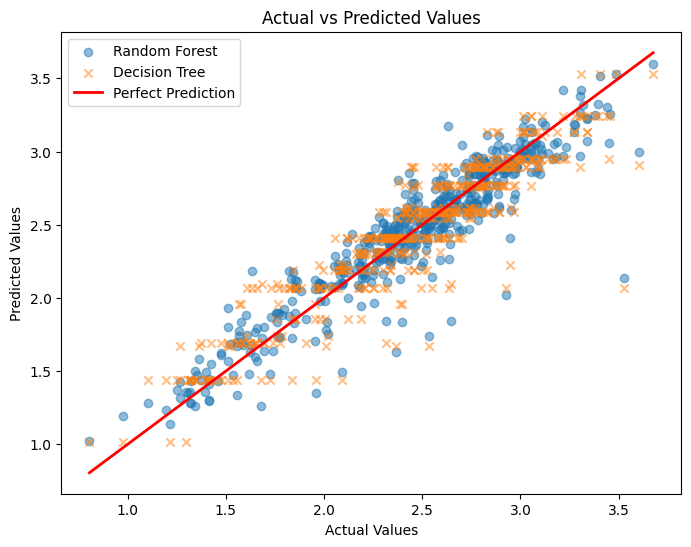

In [ ]:
#visualisations
import matplotlib.pyplot as plt

# Actual vs. Predicted Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_best, alpha=0.5, label='Random Forest', marker='o')
plt.scatter(y_test, y_pred_dt_best, alpha=0.5, label='Decision Tree', marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

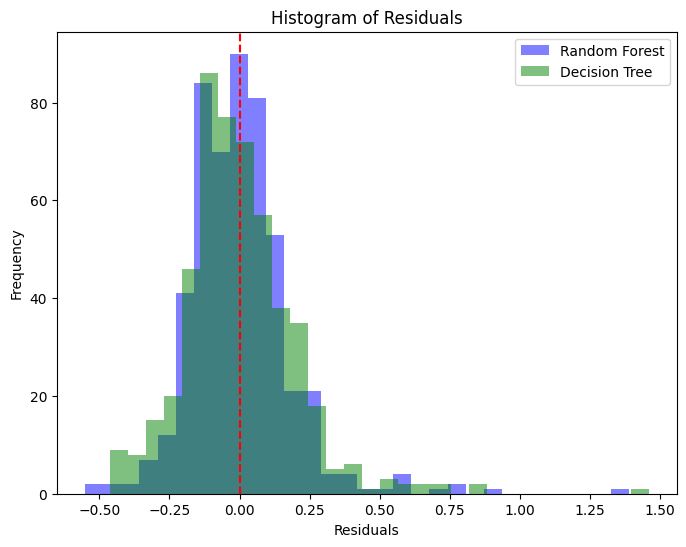

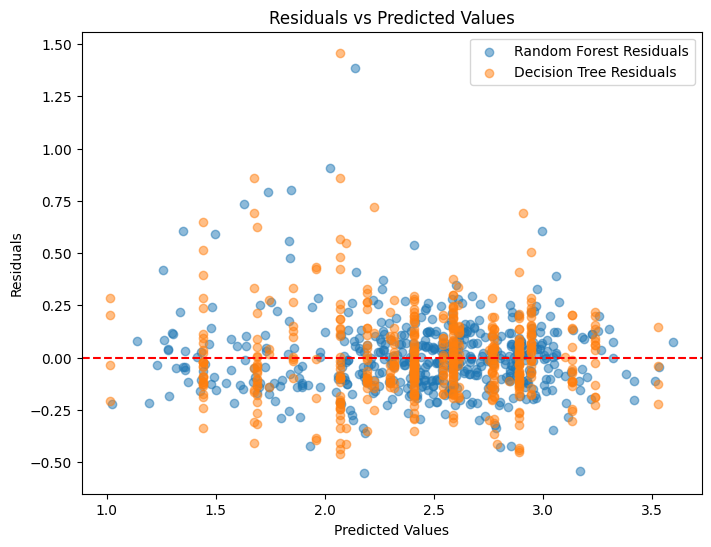

In [ ]:
# Residual Analysis
#Purpose: Analyze the residuals (errors) to check for patterns or biases.
#Plot:
#Histogram of residuals to check for normality.
#Residuals vs. Predicted values to ensure no systematic errors.
# Residuals Calculation
residuals_rf = y_test - y_pred_rf_best
residuals_dt = y_test - y_pred_dt_best

# Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals_rf, bins=30, alpha=0.5, label='Random Forest', color='blue')
plt.hist(residuals_dt, bins=30, alpha=0.5, label='Decision Tree', color='green')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()
plt.show()

# Residuals vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf_best, residuals_rf, alpha=0.5, label='Random Forest Residuals')
plt.scatter(y_pred_dt_best, residuals_dt, alpha=0.5, label='Decision Tree Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.show()

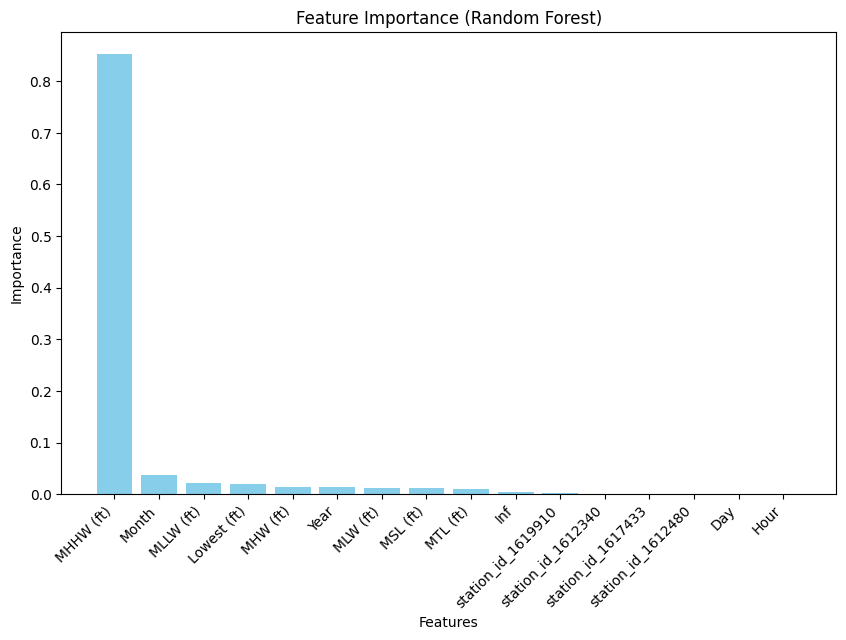

In [ ]:
#Feature Importance
#Purpose: Identify the most important features for the Random Forest model.
import pandas as pd
# Feature Importance from Random Forest
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.xticks(rotation=45, ha='right')
plt.show()

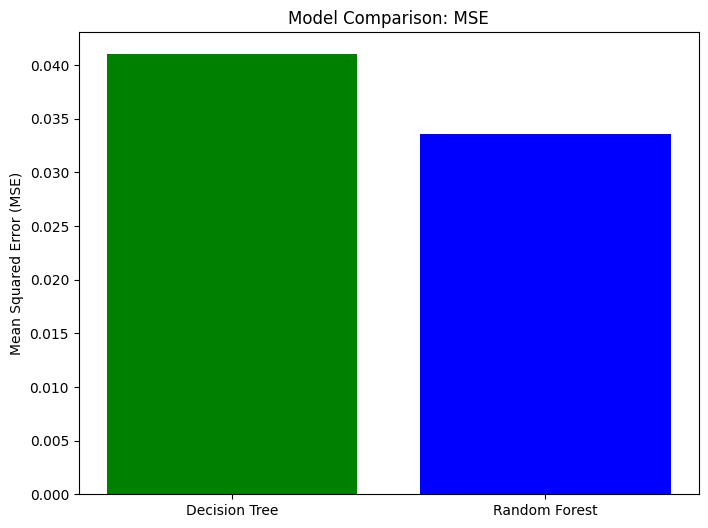

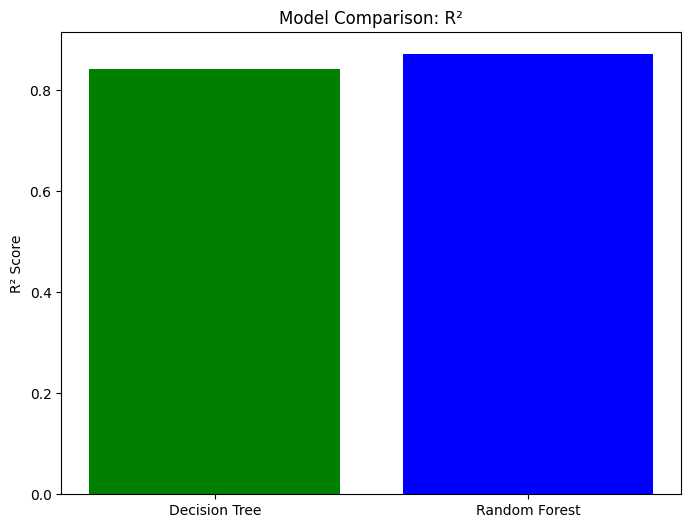

In [ ]:
import numpy as np

# Metrics for Comparison
models = ['Decision Tree', 'Random Forest']
mse_scores = [mse_dt_best, mse_rf_best]
r2_scores = [r2_dt_best, r2_rf_best]

# MSE Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, mse_scores, color=['green', 'blue'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison: MSE')
plt.show()

# R² Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color=['green', 'blue'])
plt.ylabel('R² Score')
plt.title('Model Comparison: R²')
plt.show()

In [ ]:
from google.colab import files
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>